# <p style="padding:20px;background-color:#ffe7a0;margin:0;color:(0,0,0);font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">DECISION TREE</p>


### <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">Nội dung</p>

1. Giới thiệu
2. Các ứng dụng
3. Thuật toán
4. Ưu/khuyết điểm
5. Xây dựng Decision Tree sử dụng sklearn

## 1. Giới thiệu
+ Decision Tree là thuật toán thuộc nhóm Supervised Learning được sử dụng cho cả **classification** và **regression**. Ngày nay, thuật toán Decision Tree được biết đến với tên **CART** (viết tắt của **Classification and Regression Trees**). 
+ Là thuật toán theo mô hình cây được sử dụng để xác định kết quả của hành động. Mỗi nhánh cây đại diện cho một quyết định, sự xuất hiện hay phản ứng có thể xảy ra.

## 2. Các ứng dụng
+ Decision Tree được sử dụng để phát triển các mô hình dự đoán và phân loại trong nhiều lĩnh vực khác nhau như:
    + Business Management
    + Customer Relationship Management
    + Fraudulent Statement Detection
    + Engineering
    + Energy Consumption
    + Fault Diagnosis
    + Healthcare Management
    + Agriculture
    + ...

**Ví dụ:**  
    + Đánh giá các cơ hội mở rộng thương hiệu cho một doanh nghiệp sử dụng dữ liệu bán hàng lịch sử.  
    + Xác định khả năng khách hàng mua sản phẩm sử dụng dữ liệu nhân khẩu học cho phép nhắm đến mục tiêu ngân sách quảng cáo hạn chế.  
    + Dự đoán khả năng cho khách hàng vay tiền sử dụng các mô hình dự đoán được tạo ra từ dữ liệu lịch sử.  
    + Giúp ưu tiên điều trị bệnh nhân trong phòng cấp cứu bằng mô hình dự đoán dựa trên các yếu tố như tuổi, huyết áp, giới tính, vị trí và mức độ nghiêm trọng của cơn đau và các phép đo khác.

+ Ngoài ra, Decision Tree thường được sử dụng trong nghiên cứu hoạt động, đặc biệt trong phân tích quyết định, giúp xác định chiến lược có khả năng đạt được mục tiêu tốt nhất.

## 3. Thuật toán
### Ý tưởng
+ Tìm các tính năng (feature) mô tả có chứa "thông tin" nhất về target feature và sau đó chia tập dữ liệu dọc theo các giá trị của các feature này sao cho các giá trị target feature cho các tập con (sub_dataset) càng "thuần khiết" càng tốt.

=> Các tính năng mô tả dẫn đến target feature "thuần khiết" nhất được gọi là có "thông tin" nhất.

+ Quá trình tìm kiếm các tính năng có thông tin nhất ("most infor mative") được thực hiện cho đến khi chúng ta hoàn thành điều kiện dừng khi cuối cùng kết thúc ở nút lá (**leaf node**). Các nút lá chứa các thông tin dự đoán mà chúng ta sẽ thực hiện cho các thực thể mới được trình bày cho trained model.
+ Điều này khả thi vì model đã học được cấu trúc cơ bản của dữ liệu huấn luyện (training data) và do đó có thể đưa ra một số giả định, đưa ra các dự đoán về giá trị target feature (class) của các thực thể chưa biết.

### Xây dựng cây quyết định
+ Bắt đầu với tất cả các sample tại một node.
+ Các sample phân vùng dựa trên input để tạo tập con thuần khiết nhất (purest subset).
+ Lặp lại quá trình phân vùng dữ liệu vào các tập con thuần khiết hơn.

### GINI
+ Làm việc với categorical target variable (ví dụ: "Success" hay "Failure", "Pass" hay "Fail")
+ Thực hiện chia cây theo Binary splits (2 nhánh).
+ Gini index càng thấp thì tính đồng nhất càng cao.
+ CART (Classification and Regression Tree) sử dụng Gini method để tạo binary splits.

$$Gini = 1 - \sum_{i=1}^c(P_i)^2 $$

+ Tính Gini cho từng thuộc tính, theo class kết quả.
+ Thuộc tính nào trong nhóm các thuộc tính có gini bé nhất => chọn thuộc tính đó để chia nhánh cho cây.

**Tính Gini index cho thuộc tính**
+ Làm tương tự cho các thuộc tính còn lại.
+ So sánh gini của các thuộc tính => chọn thuộc tính có gini nhỏ nhất để chia cây.

## Entropy và Information Gain
**Entropy**
+ Entropy = 0: mẫu hoàn toàn thuần khiết.
+ Entropy = 1: mẫu không thuần khiết (trộn đều).
+ Tuỳ vào số lượng các class trong dataset, entropy có thể lớn hơn 1, tuy nhiên ý nghĩa như nhau: Entropy càng lớn thì càng ít thuần khiết.

**Information Gain**
+ Dựa vào việc giảm entropy sau khi dataset được phân chia dựa trên một thuộc tính.
+ Việc xây dựng decision tree dựa vào việc tìm thuộc tính trả về information gain cao nhất (các nhánh đồng nhất nhất).

$$Entropy = \sum_{i=1}^c - p_i*log_2(p_i)$$

Hoặc: 

$$Entropy = -\sum_{i=1}^cp_i*log_2(p_i)$$

$$Gain(T, X) = Entropy(T) - Entropy(T, X)$$

+ Tính Gain cho từng thuộc tính, theo class kết quả.
+ Thuộc tính nào trong nhóm các thuộc tính có Gain lớn nhất => chọn thuộc tính đó để chia nhánh cho cây.

**Khi nào dừng chia nhỏ node?**
+ Khi tất cả các sample có class label.
+ Số lượng các sample trong node đạt đến mức tối thiểu.
+ Thay đổi trong đo lường độ không đồng nhất nhỏ hơn ngưỡng (threshold).
+ Đạt được độ sâu cây tối đa.
+ ...

**Decision Tree trong Classification**
+ Cây kết quả thường đơn giản và dễ diễn giải.
+ Tính toán không tốn kém.
+ Dùng ranh giới quyết định là Rectilinear.

## 4. Ưu/khuyết điểm
### Ưu điểm
+ Dễ hiểu, dễ xây dựng mô hình.
+ Không cần chuẩn hoá tính năng.
+ Có thể áp dụng trong cả Classification và Regression.
+ Có thể mô hình các quan hệ phi tuyến (non-linear relationship).
+ Có thể mô hình các tương tác giữa các tính năng mô tả khác nhau.

### Khuyết điểm
+ Nếu tính năng liên tục (continuous feature) được sử dụng thì cây có thể trở nên rất lớn và ít diễn giải.
+ Những thay đổi nhỏ trong dữ liệu có thể dẫn đến cây hoàn toàn khác (**có thể dùng random forest để khắc phục**).
+ Nếu số lượng tính năng tương đối lớn àm số lượng mẫu lại nhỏ có thể dẫn đến không phù hợp dữ liệu.

### Overfitting in Decision Tree algorithm
Overfitting là một vấn đề thực tế trong khi xây dựng mô hình Cây quyết định. Vấn đề trang bị quá mức được xem xét khi thuật toán tiếp tục đi sâu hơn và sâu hơn để giảm lỗi tập huấn luyện nhưng lại dẫn đến lỗi tập kiểm tra tăng lên. Vì vậy, độ chính xác của dự đoán cho mô hình của chúng tôi đi xuống. Nó thường xảy ra khi chúng ta xây dựng nhiều nhánh do dữ liệu ngoại lệ và bất thường.

Hai cách tiếp cận có thể được sử dụng để tránh trang bị quá mức như sau:
+ Pre-Pruning
+ Post-Pruning

**Pre-Pruning**
+ Trong pre-pruning, chúng tôi dừng việc xây dựng cây sớm hơn một chút. Chúng tôi không muốn tách một nút nếu thước đo mức độ tốt của nó thấp hơn giá trị ngưỡng. Nhưng thật khó để chọn một điểm dừng thích hợp.

**Post-Pruning**
+ Trong post-pruning, chúng tôi đi sâu hơn và sâu hơn trong cây để xây dựng một cây hoàn chỉnh. Nếu cây cho thấy vấn đề thừa thì việc cắt tỉa được thực hiện như một bước sau khi cắt tỉa. Chúng tôi sử dụng dữ liệu xác thực chéo để kiểm tra hiệu quả của việc cắt tỉa của chúng tôi. Sử dụng dữ liệu xác thực chéo, chúng tôi kiểm tra xem việc mở rộng một nút có dẫn đến cải thiện hay không. Nếu nó cho thấy một sự cải thiện, thì chúng ta có thể tiếp tục bằng cách mở rộng nút đó. Nhưng nếu nó cho thấy độ chính xác giảm thì không nên mở rộng. Vì vậy, nút nên được chuyển đổi thành nút lá.

## 5. Xây dựng Decision Tree sử dụng sklearn
### Xây dựng cây quyết định sử dụng sklearn
+ `sklearn.tree.DecisionTreeClassifier`: Đây là một mô hình phân loại dựa trên cây quyết định rất mạnh mẽ giúp chúng ta có thể thực hiện một tree model nhanh hơn, hiệu quả hơn và gọn gàng hơn chỉ vài dòng lệnh.
+ `sklearn.tree.DecisionTreeRegressor`: Đây là một mô hình dự đoán numeric dựa trên cây quyết định.

# <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">THỰC HÀNH</p>


<a class="anchor" id="0.1"></a>
### **Table of Contents**

1.	[Import libraries](#1)
2.	[Import dataset](#2)
3.	[Exploratory data analysis](#3)
4.	[Declare feature vector and target variable](#4)
5.	[Split data into separate training and test set](#5)
6.	[Feature engineering](#6)
7.	[Decision Tree classifier with criterion gini-index](#7)
8.	[Decision Tree classifier with criterion entropy](#8)
9.	[Confusion matrix](#9)
10.	[Classification report](#10)
11.	[Results and conclusion](#11)

# 1. Import libraries <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

import warnings
warnings.filterwarnings('ignore')

# 2. Import dataset <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In [2]:
df = pd.read_csv('car_evaluation.csv', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 3. Exploratory data analysis <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

Tiếp theo, tôi sẽ thực hiện khám phá dữ liệu để hiểu rõ hơn về bộ dữ liệu phân tích.

In [3]:
# view dimensions of dataset
df.shape

(1728, 7)

**Nhận xét:** Bộ dữ liệu có 1728 dòng và 7 cột.

### View top 5 rows of dataset

In [4]:
# preview the dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

Chúng ta có thể thấy rằng tập dữ liệu không có tên cột thích hợp. Các cột chỉ được dán nhãn là 0, 1, 2, ... Chúng ta nên đặt tên thích hợp cho các cột. Tôi sẽ làm như sau:

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**Nhận xét:** Tên cột đã được thay đổi cho phù hợp.

### View summary of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables
Tiếp theo, ta sẽ kiểm tra số lượng tần suất của các biến phân loại.

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


**Nhận xét:** Chúng ta có thể thấy rằng `doors` và `persons` là categorical in nature. Vì vậy, tôi sẽ coi chúng là các biến phân loại.

### Summary of variables
+ Có 7 biến trong tập dữ liệu. Tất cả các biến thuộc loại dữ liệu phân loại.
+ Tên các biến lần lượt là `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` và `class`.
- `class` là biến **target** (target variable).

### Explore `class` variable

In [9]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

**Nhận xét:** `class` target variable có các giá trị phân loại theo thang đo.

### Missing values in variables

In [10]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

**Nhận xét:** Chúng ta có thể thấy rằng không có giá trị nào bị thiếu trong tập dữ liệu. Tôi đã kiểm tra phân phối tần suất của các giá trị trước đó. Nó cũng xác nhận rằng không có giá trị nào bị thiếu trong tập dữ liệu.

# 4. Declare feature vector and target variable <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [11]:
X = df.drop(['class'], axis=1)
y = df['class']

# 5. Split data into separate training and test set <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [12]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# 6. Feature Engineering <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

**Feature Engineering** là quá trình chuyển đổi dữ liệu thô thành các tính năng hữu ích giúp chúng tôi hiểu rõ hơn về mô hình của mình và tăng khả năng dự đoán của mô hình. Tôi sẽ thực hiện kỹ thuật tính năng trên các loại biến khác nhau.

Đầu tiên, tôi sẽ kiểm tra lại kiểu dữ liệu của các biến.

In [14]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables
Bây giờ, tôi sẽ mã hóa các biến phân loại.

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


**Nhận xét:** Chúng ta có thể thấy rằng tất cả các biến là kiểu dữ liệu phân loại thứ tự.

In [16]:
# import category encoders
import category_encoders as ce

In [17]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


**Nhận xét:** training và test set đã phù hợp cho phân tích.

# 7. Decision Tree Classifier with criterion gini index <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [20]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [22]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


### Compare the train-set and test-set accuracy
So sánh độ chính xác của tập huấn luyện và tập kiểm tra để kiểm tra xem có trang bị overfitting không.

In [24]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [26]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


**Nhận xét:** Ta thấy, training-set accuracy score là 0,7865 trong khi test-set accuracy là 0,8021. Hai giá trị này khá tương đương nhau. Vì vậy, không có dấu hiệu của overfitting.

### Visualize decision-trees

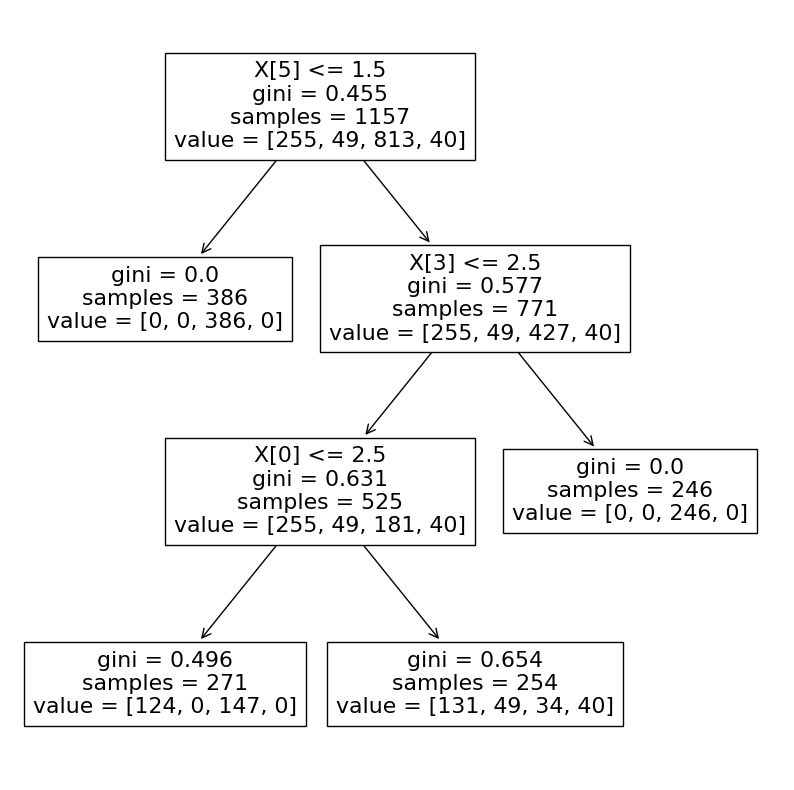

In [27]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show();

### Visualize decision-trees with graphviz

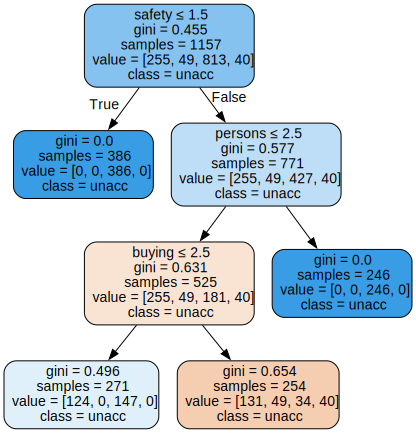

In [28]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph 
# Image(graph.create_png())

# 8. Decision Tree Classifier with criterion entropy <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [29]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [30]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


### Compare the train-set and test-set accuracy

In [32]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


### Check for overfitting and underfitting

In [34]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


**Nhận xét:** Chúng ta có thể thấy rằng điểm của tập huấn luyện và điểm của tập kiểm tra giống như trên. Điểm chính xác của tập huấn luyện là 0,7865 trong khi độ chính xác của tập kiểm tra là 0,8021. Hai giá trị này khá tương đương nhau. Vì vậy, không có dấu hiệu của overfitting.

### Visualize decision-trees

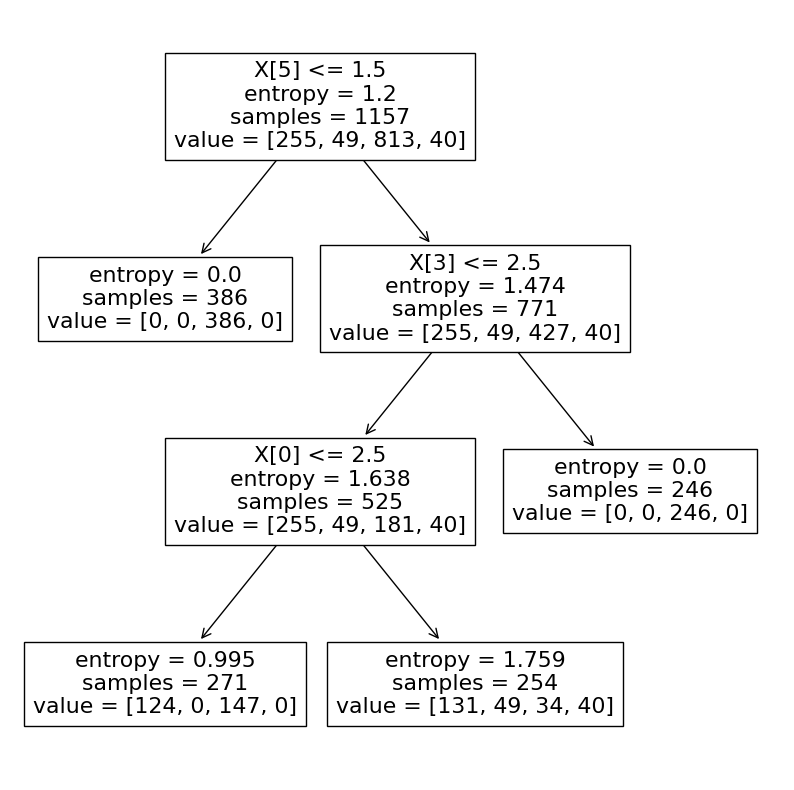

In [35]:
plt.figure(figsize=(10, 10))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 
plt.show();

### Visualize decision-trees with graphviz

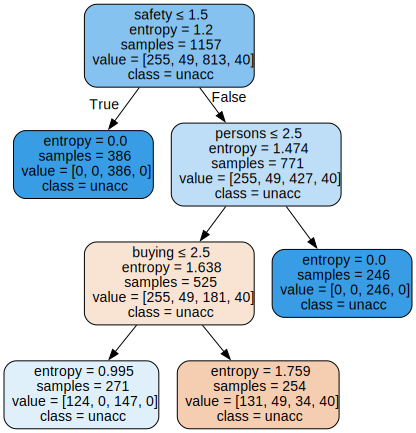

In [36]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

**Nhận xét:**
+ Bây giờ, dựa trên phân tích trên, chúng tôi có thể kết luận rằng độ chính xác của mô hình phân loại của chúng tôi là rất tốt. Mô hình của chúng tôi đang làm rất tốt công việc dự đoán các nhãn lớp.
+ Tuy nhiên, nó không đưa ra sự phân phối cơ bản của các giá trị. Ngoài ra, nó không cho biết bất cứ điều gì về loại lỗi mà trình phân loại của chúng tôi đang mắc phải.
+ Chúng tôi có một tool khác là `Confusion matrix`.

# 9. Confusion matrix <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

Ma trận nhầm lẫn (**confusion matrix**) là một công cụ để tóm tắt hiệu suất của thuật toán phân loại. Một ma trận nhầm lẫn sẽ cho chúng ta một bức tranh rõ ràng về hiệu suất của mô hình phân loại và các loại lỗi do mô hình tạo ra. Nó cung cấp cho chúng tôi một bản tóm tắt các dự đoán chính xác và không chính xác được chia nhỏ theo từng danh mục. Tóm tắt được thể hiện dưới dạng bảng.

Bốn loại kết quả có thể xảy ra khi đánh giá hiệu suất của mô hình phân loại. Bốn kết quả này được mô tả dưới đây:

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**

Bốn kết quả này được tóm tắt trong một ma trận nhầm lẫn được đưa ra dưới đây.

In [37]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


# 10. Classification Report <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

**Classification report** là một cách khác để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị **precision**, **recall**, **f1** và **support**.

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



# 11. Results and conclusion <a class="anchor" id="11"></a>
[Table of Contents](#0.1)

1. Trong **Project** này, tôi xây dựng mô hình **Decision-Tree Classifier** để dự đoán độ an toàn của ô tô. Tôi xây dựng hai mô hình, một mô hình có tiêu chí `gini index` và một mô hình khác có tiêu chí `entropy`. Mô hình mang lại hiệu suất rất tốt được biểu thị bằng độ chính xác của mô hình trong cả hai trường hợp được tìm thấy là 0,8021.
2. Trong mô hình với tiêu chí `gini index`, điểm chính xác của tập huấn luyện là 0,7865 trong khi độ chính xác của tập kiểm tra là 0,8021. Hai giá trị này khá tương đương nhau. Vì vậy, không có dấu hiệu của overfitting.
3. Tương tự, trong mô hình với tiêu chí `entropy`, điểm chính xác của tập huấn luyện là 0,7865 trong khi độ chính xác của tập kiểm tra là 0,8021. Ta nhận được các giá trị giống như trong trường hợp với tiêu chí `gini`. Vì vậy, **không có dấu hiệu của overfitting.**
4. Trong cả hai trường hợp, điểm chính xác của tập huấn luyện và tập kiểm tra là như nhau. Nó có thể xảy ra do tập dữ liệu nhỏ.
5. Ma trận nhầm lẫn (**Confusion matrix**) và báo cáo phân loại (**Classification Report**) mang lại hiệu suất mô hình rất tốt.

**<span style="color:#034235;"> Thanks for reading this post. </span>**

_______
_Make by_**<span style="color:#034235;"> Lucas,</span>**
### <p style="background-color:#034235;font-family:newtimeroman;color:#ffe7a0;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>
______
<img src="https://github.com/LeHongNgoc3820/Lucas_viet_Blog/blob/b5e2de5a812292889e793b719572d06f3ababf2d/Logo%20ta%CC%81ch%20ne%CC%82%CC%80n.png?raw=true"
     style="width:200px;height:200px;">

**<span style="color:#034235;"> You can contact with me on:</span>**
+ **Gmail**: lehongngoc.work@gmail.com
+ **GitHub**: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)
+ **Linkedln**: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)